In [1]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv("/content/drive/My Drive/ColabNotebooks/MachineLearning/LogisticRegression/BreastCancerPrediction/Breast_cancer_data.csv")

In [9]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


**Check Nan values**

In [10]:
dataset.isna().sum()
#dataset.isnull().sum() # check missing by variable.

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

**Check Unique value of the column**

In [11]:
dataset['mean_radius'].unique()

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

In [13]:
dataset['mean_texture'].unique()

array([10.38, 17.77, 21.25, 20.38, 14.34, 15.7 , 19.98, 20.83, 21.82,
       24.04, 23.24, 17.89, 24.8 , 23.95, 22.61, 27.54, 20.13, 20.68,
       22.15, 14.36, 15.71, 12.44, 14.26, 23.04, 21.38, 16.4 , 21.53,
       20.25, 25.27, 15.05, 25.11, 18.7 , 23.98, 26.47, 17.88, 21.59,
       21.72, 18.42, 25.2 , 20.82, 21.58, 21.35, 24.81, 20.28, 21.81,
       17.6 , 16.84, 18.66, 14.63, 22.3 , 21.6 , 16.34, 18.24, 22.02,
       18.75, 18.57, 19.31, 11.79, 14.88, 20.98, 13.86, 23.84, 23.94,
       21.01, 19.04, 17.33, 16.49, 21.31, 14.64, 24.52, 15.79, 16.52,
       19.65, 10.94, 16.15, 23.97, 18.  , 20.97, 15.86, 24.91, 26.29,
       15.65, 18.52, 21.46, 24.59, 21.8 , 15.24, 24.02, 22.76, 14.76,
       18.3 , 19.83, 23.03, 17.84, 19.94, 12.84, 19.77, 24.98, 13.43,
       20.52, 19.4 , 19.29, 15.56, 18.33, 18.54, 19.67, 21.26, 16.99,
       20.76, 20.19, 15.83, 15.76, 16.67, 22.91, 20.01, 10.82, 17.12,
       20.2 , 10.89, 16.39, 17.21, 24.69, 18.91, 25.12, 13.29, 19.48,
       21.54, 13.93,

In [15]:
dataset['mean_perimeter'].unique()

array([122.8 , 132.9 , 130.  ,  77.58, 135.1 ,  82.57, 119.6 ,  90.2 ,
        87.5 ,  83.97, 102.7 , 103.6 , 132.4 , 103.7 ,  93.6 ,  96.73,
        94.74, 108.1 ,  87.46,  85.63,  60.34, 102.5 , 137.2 , 110.  ,
       116.  ,  97.41, 122.1 , 102.4 , 115.  , 124.8 ,  77.93, 112.8 ,
       127.9 , 107.  , 110.1 ,  93.63,  82.61,  95.54,  88.4 ,  86.18,
        71.9 , 128.3 ,  87.32,  85.42, 123.7 ,  51.71,  85.98,  78.04,
        86.91,  74.72,  87.21,  75.71, 120.3 ,  97.26,  73.34, 125.5 ,
        95.55,  54.34,  64.55,  54.66,  96.42,  59.2 ,  82.69,  97.4 ,
        60.11,  71.8 ,  58.79,  81.37, 123.6 , 114.2 ,  90.43,  79.19,
       104.1 ,  87.91, 120.2 , 143.7 ,  83.19,  73.81,  86.49, 171.5 ,
       129.1 ,  76.95, 121.1 ,  94.25, 122.  ,  79.78,  95.77,  94.57,
       100.2 ,  84.74,  86.6 , 100.3 ,  77.79,  62.11,  74.34,  94.48,
        88.05,  43.79,  77.22,  63.95,  67.41,  75.17,  79.01, 152.8 ,
        72.48,  62.5 ,  82.15,  97.83,  68.64,  55.84,  76.53,  58.74,
      

In [16]:
dataset['mean_area'].unique()

array([1001. , 1326. , 1203. ,  386.1, 1297. ,  477.1, 1040. ,  577.9,
        519.8,  475.9,  797.8,  781. , 1123. ,  782.7,  578.3,  658.8,
        684.5,  798.8, 1260. ,  566.3,  520. ,  273.9,  704.4, 1404. ,
        904.6,  912.7,  644.8, 1094. ,  732.4,  955.1, 1088. ,  440.6,
        899.3, 1162. ,  807.2,  869.5,  633. ,  523.8,  698.8,  559.2,
        563. ,  371.1, 1104. ,  545.2,  531.5, 1076. ,  201.9,  534.6,
        449.3,  561. ,  427.9,  571.8,  437.6, 1033. ,  712.8,  409. ,
       1152. ,  656.9,  527.2,  224.5,  311.9,  221.8,  645.7,  260.9,
        499. ,  668.3,  269.4,  394.1,  250.5,  502.5, 1130. ,  244. ,
        929.4,  584.1,  470.9,  817.7, 1006. , 1245. ,  506.3,  401.5,
       1878. , 1132. ,  443.3, 1075. ,  648.2,  466.1,  651.9,  662.7,
        728.2,  551.7,  555.1,  705.6, 1264. ,  451.1,  294.5,  412.6,
        642.5,  582.7,  143.5,  458.7,  298.3,  336.1,  530.2,  412.5,
        466.7, 1509. ,  396.5,  290.2,  480.4,  629.9,  334.2,  230.9,
      

In [17]:
dataset['mean_smoothness'].unique()

array([0.1184 , 0.08474, 0.1096 , 0.1425 , 0.1003 , 0.1278 , 0.09463,
       0.1189 , 0.1273 , 0.1186 , 0.08206, 0.0971 , 0.0974 , 0.08401,
       0.1131 , 0.1139 , 0.09867, 0.117  , 0.09831, 0.09779, 0.1075 ,
       0.1024 , 0.1073 , 0.09428, 0.1121 , 0.1054 , 0.0944 , 0.1082 ,
       0.09847, 0.1064 , 0.1109 , 0.1197 , 0.09401, 0.104  , 0.0961 ,
       0.09823, 0.08983, 0.09387, 0.1016 , 0.08162, 0.1227 , 0.09081,
       0.1041 , 0.09714, 0.1099 , 0.086  , 0.1158 , 0.1031 , 0.08752,
       0.08637, 0.07685, 0.08261, 0.1148 , 0.09056, 0.09524, 0.1053 ,
       0.1137 , 0.0806 , 0.09752, 0.1134 , 0.1243 , 0.1049 , 0.07721,
       0.1122 , 0.1172 , 0.1044 , 0.08139, 0.1066 , 0.09009, 0.09783,
       0.1071 , 0.1007 , 0.09172, 0.09168, 0.1291 , 0.1065 , 0.1286 ,
       0.09934, 0.1102 , 0.1078 , 0.1063 , 0.1215 , 0.09723, 0.09874,
       0.09444, 0.09029, 0.08772, 0.1132 , 0.08974, 0.092  , 0.07355,
       0.1022 , 0.1039 , 0.09078, 0.1045 , 0.09488, 0.08013, 0.1005 ,
       0.09989, 0.13

In [18]:
dataset['diagnosis'].unique()

array([0, 1])

In [12]:
dataset.describe() # describe() define the statistical  view.

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [19]:
dataset.info() #info() define the shape of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [20]:
dataset.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

**check duplicates**

In [22]:
dataset.duplicated().sum() #The duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not

0

In [23]:
dataset.shape

(569, 6)

**Find Correlation**

<AxesSubplot:>

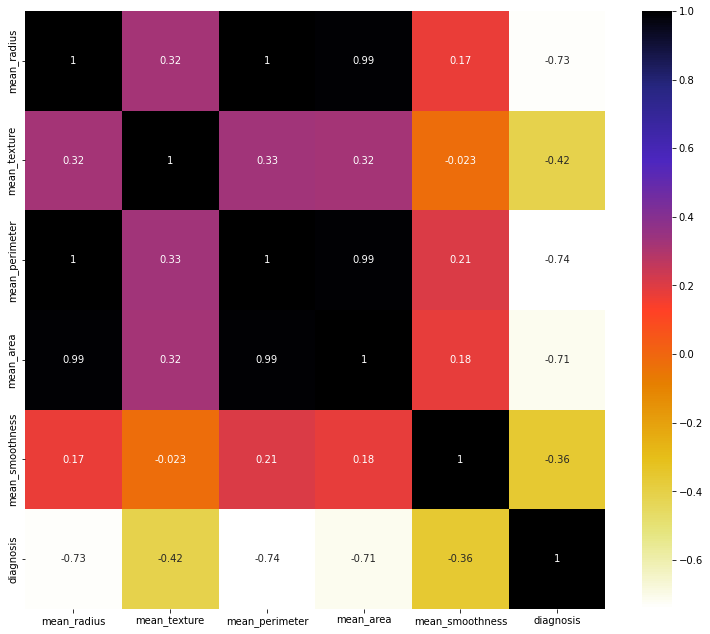

In [25]:
plt.figure(figsize=(13,11)) # ifgsize() takes two parameters- width and height (in inches)
cor=dataset.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
#annot to true gives us the numbers in each cell

In [26]:
dataset['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

**Divide features into dependent and independent column**

In [27]:
y= dataset['diagnosis'] #dependent variable is Decision
x= dataset.drop(['diagnosis'], axis=1)

**Split the data into train and test**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 
#random_state = 0 means having same result on the multiple execution
#random_state = None  means having multiple result on the multiple execution.
# test_size = 0.25 25%data test kro.

**Split the data into train and test**

In [52]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

print (xtrain[0:10, :])

[[-1.15036482 -0.39064196 -1.12855021 -0.95876358  0.3109837 ]
 [-0.93798972  0.68051405 -0.94820146 -0.82152548 -0.60963604]
 [ 0.574121   -1.03333557  0.51394098  0.40858627 -0.10616078]
 [-0.54721953 -0.3160221  -0.57762185 -0.5666148   0.5866618 ]
 [-0.52739786  0.79124029 -0.5615634  -0.52357067 -1.05144646]
 [-0.23573605 -1.30774407 -0.24821775 -0.31310165 -0.92739131]
 [-0.67181293 -1.23553131 -0.72379492 -0.63313754 -1.32639908]
 [-0.4084678  -0.44600508 -0.43515458 -0.45816595  0.46333213]
 [ 0.03044074  0.95492256  0.10506814 -0.12275716  0.8043024 ]
 [-0.80490132 -1.49068308 -0.76826447 -0.74773555  1.97956164]]


**Apply logistic regression**

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [54]:
y_pred = classifier.predict(xtest)

**Check confusion matrix**

In [55]:
from sklearn import metrics
import numpy

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)
# confusion_matrix = metrics.confusion_matrix(actual, predicted)
#ConfusionMAtrix
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
# cm_display.plot()
# plt.show()
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[43  4]
 [ 5 62]]


**Check Model Accuracy**

In [57]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9210526315789473


In [58]:
print ("Accuracy in percentage : ", accuracy_score(y_test, y_pred)*100)

Accuracy in percentage :  92.10526315789474


In [59]:
dataset.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

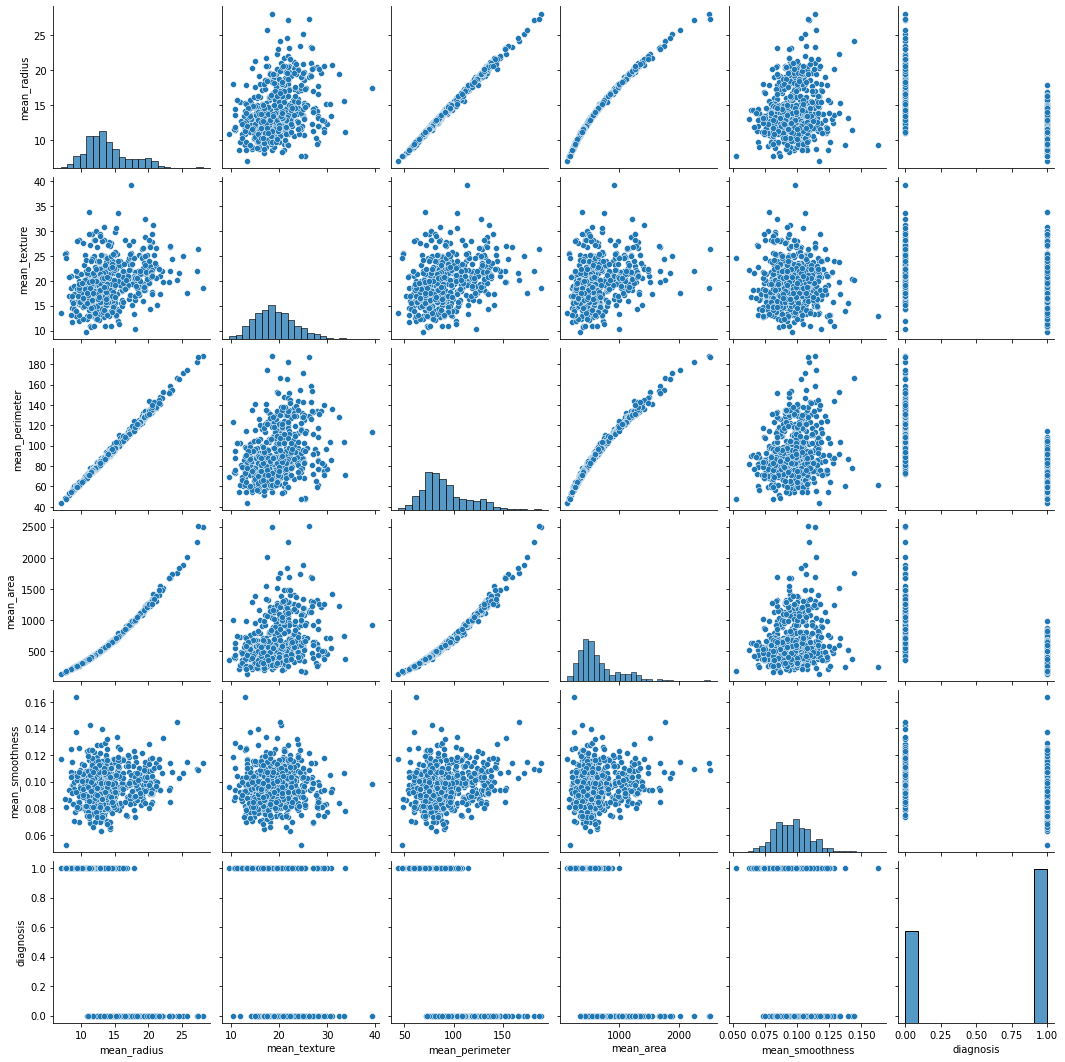

In [60]:
sns.pairplot(dataset)

In [61]:
dataset['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

**Predict values and compare with actual data**

In [62]:
predictions = classifier.predict(X_test)
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':y_test})

In [63]:
comparison.head(15)

,Predicted Values,Actual Values
512,0,0
457,0,1
439,0,1
298,0,1
37,0,1
515,0,1
382,0,1
310,0,1
538,0,1
345,0,1


**Check percentage**

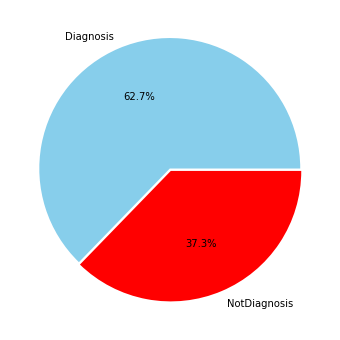

In [64]:
plt.figure(figsize=(10,6))
labels=['Diagnosis' , 'NotDiagnosis']
explode = [.01,.01]
color=['skyblue' , 'Red']
sizes=dataset.diagnosis.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.show()